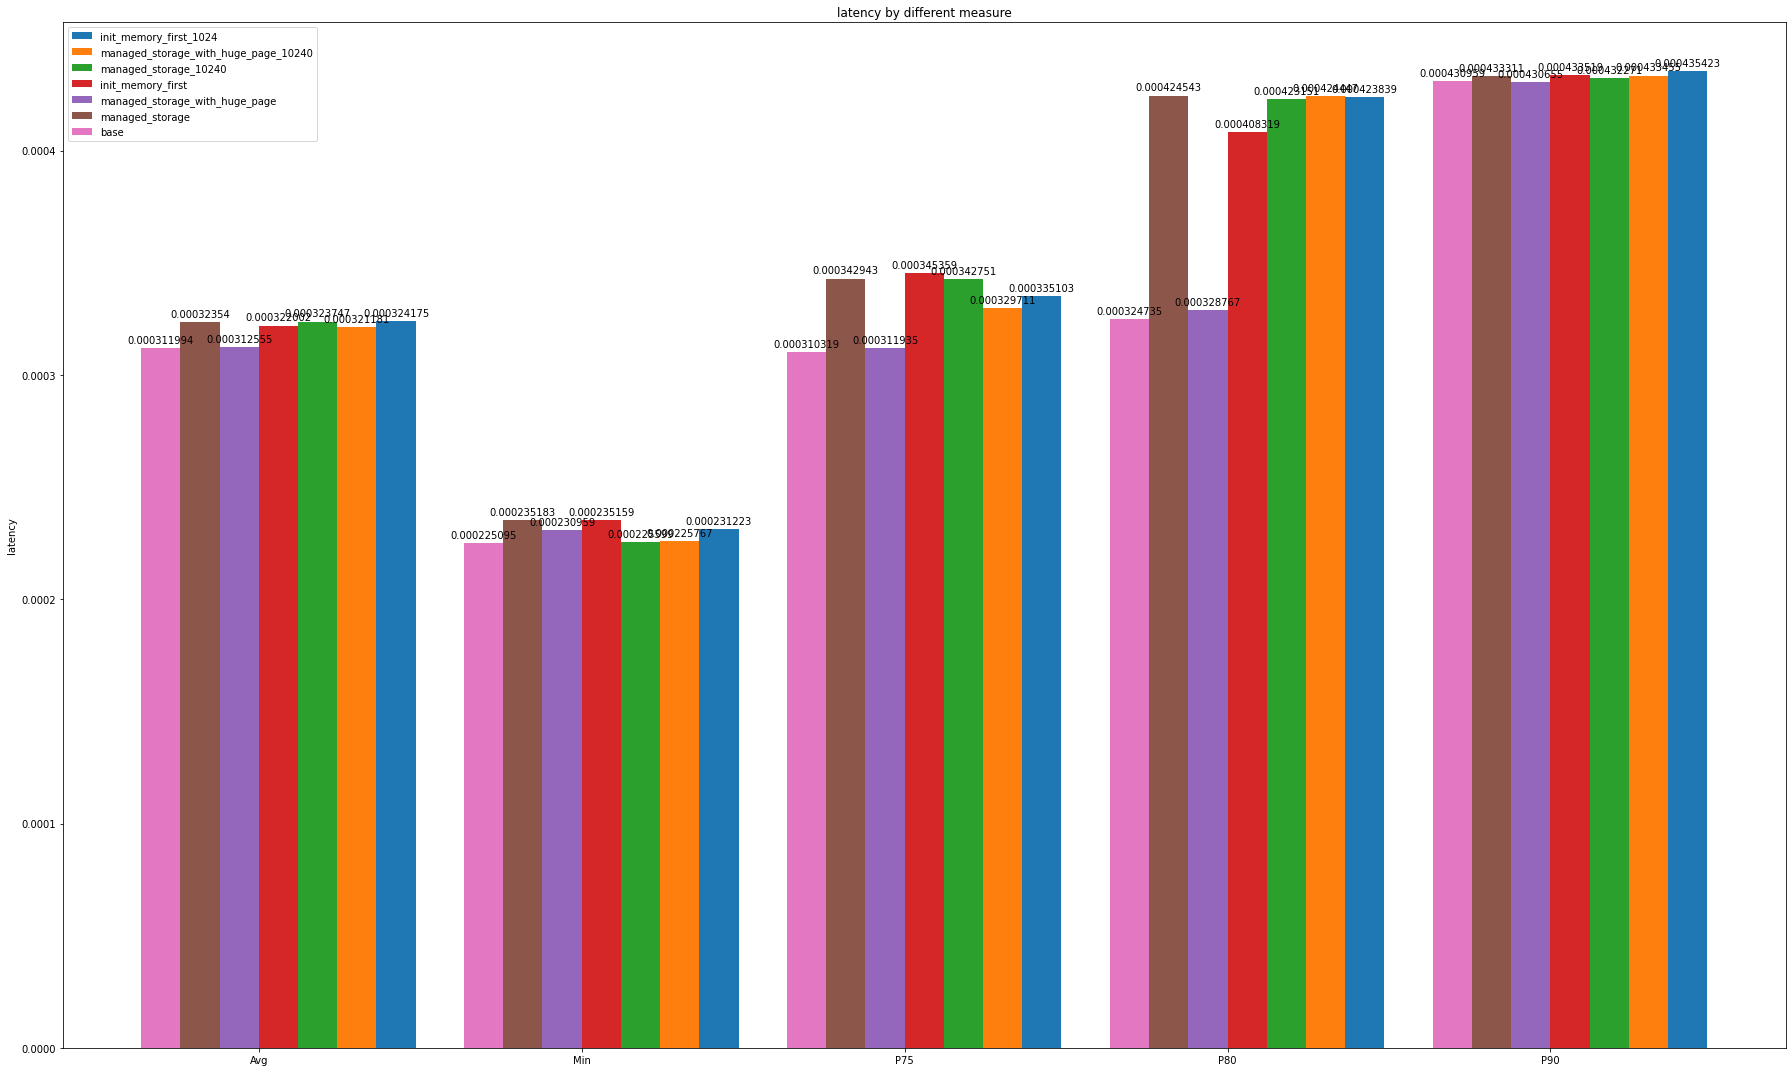

In [219]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os

benchmark_suit_dir = "./benchmark_memory_test_h2_more_cons"
benchmark_result_dir = benchmark_suit_dir + '/results'

labels = []

labels = ['Avg',
          #'Max',
          'Min',
          'P75',
          'P80',
          'P90',
          #'P99'
         ]
data = {}
results = list(os.listdir(benchmark_result_dir))
#results = sorted(results, key=lambda r: int(r.split('_')[0]))
               
for benchmark_result in results:
    file_name = benchmark_result_dir + '/' + benchmark_result + '/nighthawk_result.json'
    f = open(file_name)
    json_data = json.load(f)
    p90 = 0
    p99 = 0
    p80 = 0
    p75 = 0
    for d in json_data['DurationHistogram']['Percentiles']:
        if d['Percentile'] == 90:
            p90 = d['Value']
        if d['Percentile'] == 99:
            p99 = d['Value']
        if d['Percentile'] == 80:
            p80 = d['Value']
        if d['Percentile'] == 75:
            p75 = d['Value']
    data[benchmark_result] = [
        json_data['DurationHistogram']['Avg'],
        #json_data['DurationHistogram']['Max'],
        json_data['DurationHistogram']['Min'],
        p75,
        p80,
        p90,
        #p99
    ]


x = np.arange(len(labels))  # the label locations
width = 0.85  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 15), sharey=True)
rects = []

num_result = len(data.keys())
each_width = width/num_result
i = 0 - (num_result/2 * each_width)

for benchmark_result in data:
    rect = ax.bar(x - i, data[benchmark_result], each_width, label=benchmark_result)
    ax.bar_label(rect, padding=3)
    rects.append(rect)
    i += each_width
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('latency')
ax.set_title('latency by different measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

normal Per-thread Requested QPS: 500.0, Requested QPS: 2000, Actual QPS: 1999.9657580155572, Avg latency: 0.001493125, calculated QPS: 669.7362913352866, lost rate: 0.0001
with_memory_cache Per-thread Requested QPS: 500.0, Requested QPS: 2000, Actual QPS: 1999.9987476007843, Avg latency: 0.00150159, calculated QPS: 665.9607482734968, lost rate: 0.0001


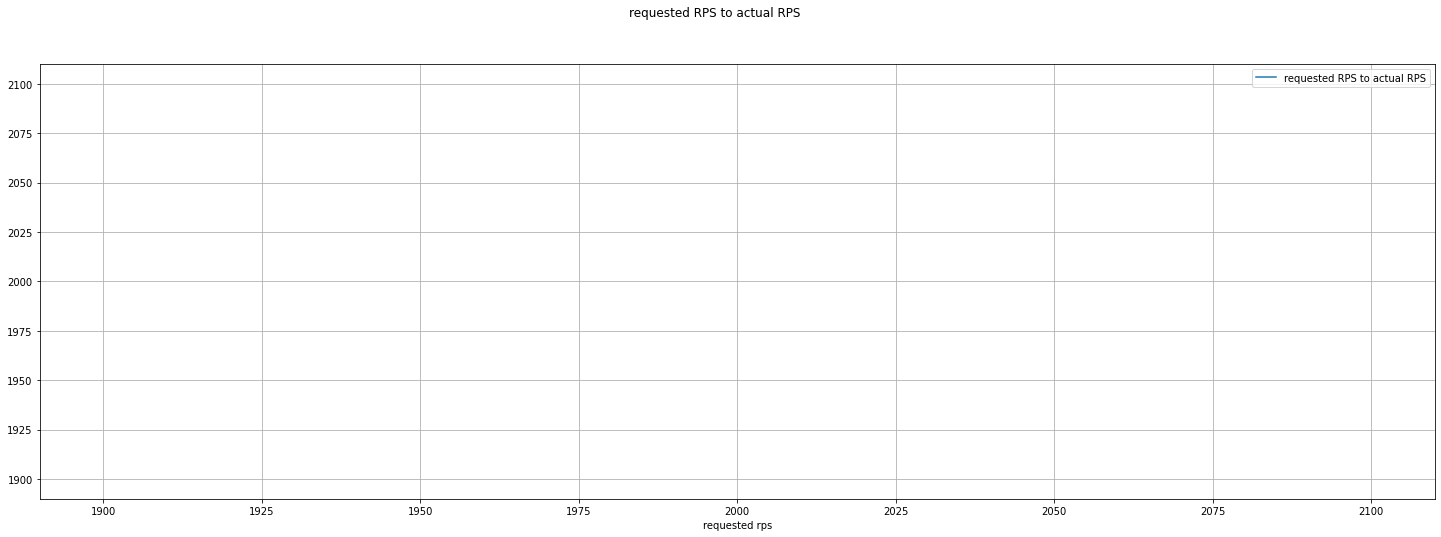

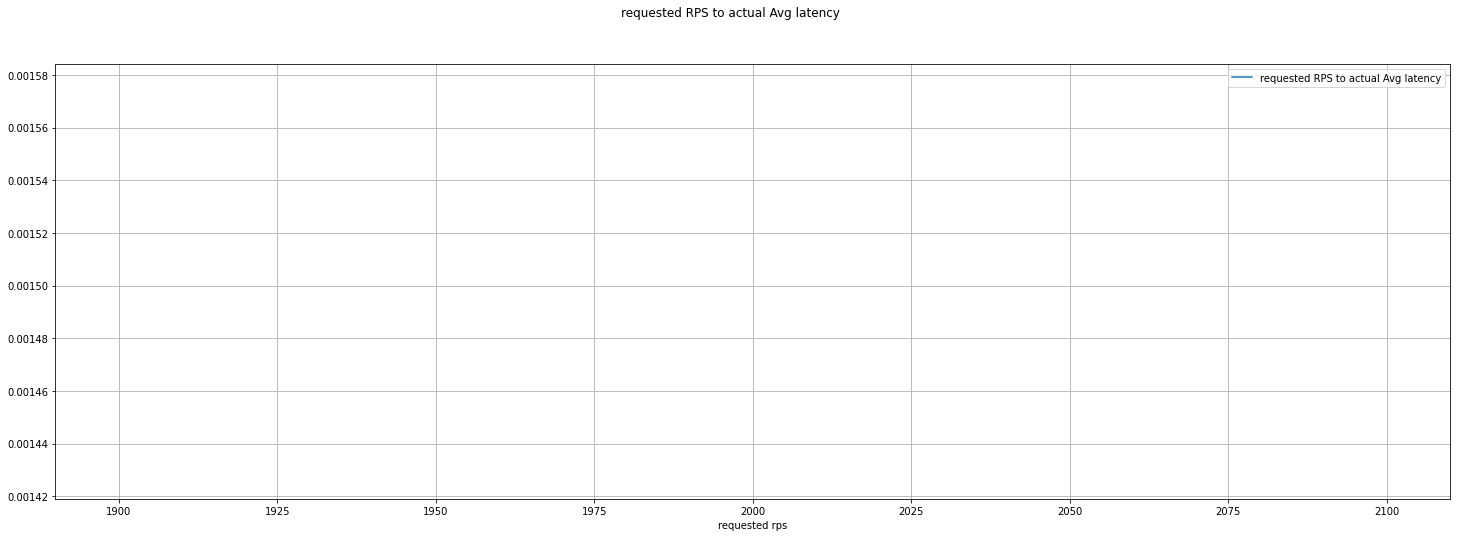

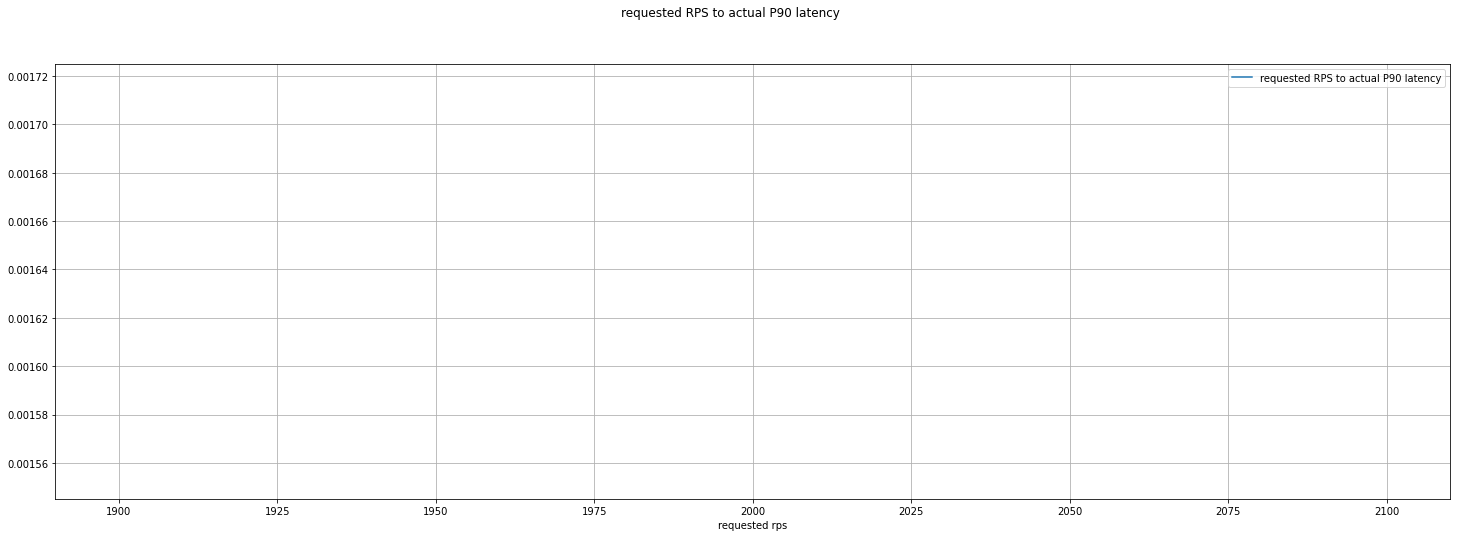

In [109]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os

benchmark_suit_dir = "./benchmark_memory_test"
benchmark_result_dir = benchmark_suit_dir + '/results'

labels = []

labels = ['Avg', 'Max', 'Min']
data = {}

requested_rps_to_actual_rps = {}
requested_rps_to_actual_latency = {}
requested_rps_to_actual_p90_latency = {}

results = list(os.listdir(benchmark_result_dir))
results.sort()

#results = sorted(results, key=lambda r: int(r.split('_')[0]) )

for benchmark_result in results:
    file_name = benchmark_result_dir + '/' + benchmark_result + '/nighthawk_result.json'
    f = open(file_name)
    json_data = json.load(f)
    requested_rps_to_actual_rps[json_data['RequestedQPS']] = json_data['ActualQPS']
    requested_rps_to_actual_latency[json_data['RequestedQPS']] = json_data['DurationHistogram']['Avg']
    
    num_requests = json_data['RequestedQPS'] * int(json_data['RequestedDuration'].split('s')[0])
    
    print("%s Per-thread Requested QPS: %s, Requested QPS: %s, Actual QPS: %s, Avg latency: %s, calculated QPS: %s, lost rate: %.4f" % (
        benchmark_result,
        json_data['RequestedQPS']/4,
        json_data['RequestedQPS'],
        json_data['ActualQPS'],
        json_data['DurationHistogram']['Avg'],
        1 / json_data['DurationHistogram']['Avg'],
        (num_requests - int(json_data['DurationHistogram']['Count']))/num_requests
    ))
    for d in json_data['DurationHistogram']['Percentiles']:
        if d['Percentile'] == 90:
            requested_rps_to_actual_p90_latency[json_data['RequestedQPS']] = d['Value']

p1 = [
    {
        'title': 'requested RPS to actual RPS',
        'axs': [
            {
                'label': 'requested RPS to actual RPS',
                'map': requested_rps_to_actual_rps
            },
        ]
    }
]
    
p2 = [
    {
        'title': 'requested RPS to actual Avg latency',
        'axs': [
            {
                'label': 'requested RPS to actual Avg latency',
                'map': requested_rps_to_actual_latency
            }
        ]
    }
]

p3 = [
    {
        'title': 'requested RPS to actual P90 latency',
        'axs': [
            {
                'label': 'requested RPS to actual P90 latency',
                'map': requested_rps_to_actual_p90_latency
            }
        ]
    }
]

def generate_plots(everything_):
    for data_maps in everything_:
        fig, axs = plt.subplots(figsize=(25, 8), sharey=True)
        fig.suptitle(data_maps['title'])
        for axs_data in data_maps['axs']:
            axs.plot(list(axs_data['map'].keys()), list(axs_data['map'].values()), label=axs_data['label'])
        axs.grid(True)
        axs.legend()
        axs.set_xlabel('requested rps')

                 
generate_plots(p1)
generate_plots(p2)
generate_plots(p3)

plt.show()

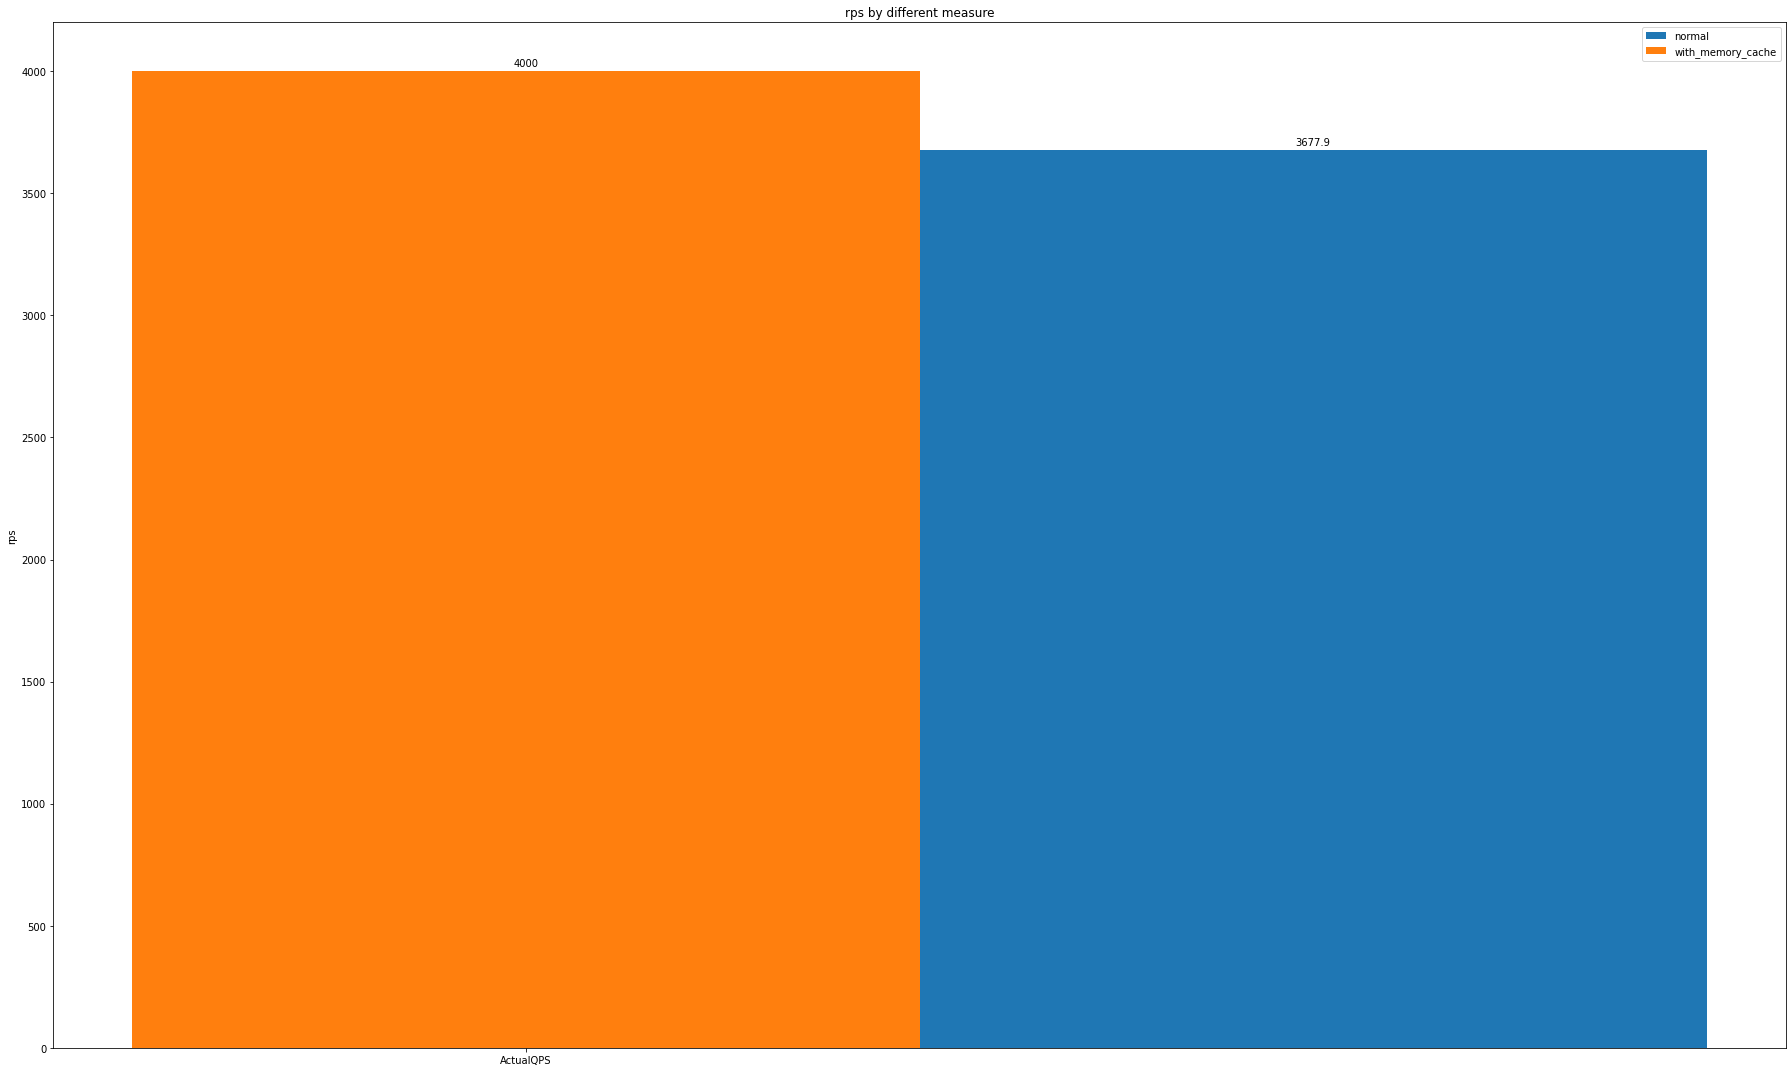

In [58]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os

benchmark_suit_dir = "./benchmark_memory_test"
benchmark_result_dir = benchmark_suit_dir + '/results'

labels = []

labels = ['ActualQPS']
data = {}
results = list(os.listdir(benchmark_result_dir))
#results = sorted(results, key=lambda r: int(r.split('_')[0]))
               
for benchmark_result in results:
    file_name = benchmark_result_dir + '/' + benchmark_result + '/nighthawk_result.json'
    f = open(file_name)
    json_data = json.load(f)
    p90 = 0
    p99 = 0
    for d in json_data['DurationHistogram']['Percentiles']:
        if d['Percentile'] == 90:
            p90 = d['Value']
        if d['Percentile'] == 99:
            p99 = d['Value']
    data[benchmark_result] = [
        json_data['ActualQPS']]


x = np.arange(len(labels))  # the label locations
width = 0.85  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 15), sharey=True)
rects = []

num_result = len(data.keys())
each_width = width/num_result
i = 0 - (num_result/2 * each_width)

for benchmark_result in data:
    rect = ax.bar(x - i, data[benchmark_result], each_width, label=benchmark_result)
    ax.bar_label(rect, padding=3)
    rects.append(rect)
    i += each_width
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('rps')
ax.set_title('rps by different measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()